In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Nodes and edges

In [3]:
df_classes = pd.read_csv('../elliptic_bitcoin_dataset/elliptic_txs_classes.csv')
df_classes.head()

FileNotFoundError: [Errno 2] No such file or directory: '../elliptic_bitcoin_dataset/elliptic_txs_classes.csv'

In [4]:
df_classes.shape

(203769, 2)

In [5]:
df_classes['class'].value_counts()

unknown    157205
2           42019
1            4545
Name: class, dtype: int64


The graph is made of 203,769 nodes and 234,355 edges. Two percent (4,545) of the nodes are labelled class1 (illicit). Twenty-one percent (42,019) are labelled class2 (licit). The remaining transactions are not labelled with regard to licit versus illicit.

In [6]:
df_edgelist = pd.read_csv('../elliptic_bitcoin_dataset/elliptic_txs_edgelist.csv')
df_edgelist.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [7]:
df_edgelist.shape

(234355, 2)

### Features

In [35]:
df_features = pd.read_csv('../elliptic_bitcoin_dataset/elliptic_txs_features.csv',header = None )
df_features.head()

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


In [36]:
df_features.shape

(203769, 167)

In [38]:
df_features[1].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
      dtype=int64)

There are 166 features associated with each node. Due to intellectual property issues, we cannot provide an exact description of all the features in the dataset. There is a time step associated to each node, representing a measure of the time when a transaction was broadcasted to the Bitcoin network. The time steps, running from 1 to 49, are evenly spaced with an interval of about two weeks. Each time step contains a single connected component of transactions that appeared on the blockchain within less than three hours between each other; there are no edges connecting the different time steps.

The first 94 features represent local information about the transaction – including the time step described above, number of inputs/outputs, transaction fee, output volume and aggregated figures such as average BTC received (spent) by the inputs/outputs and average number of incoming (outgoing) transactions associated with the inputs/outputs. The remaining 72 features are aggregated features, obtained using transaction information one-hop backward/forward from the center node - giving the maximum, minimum, standard deviation and correlation coefficients of the neighbour transactions for the same information data (number of inputs/outputs, transaction fee, etc.).

In [39]:
# based on the given data
col = ['txid','timestamp'] + ["trans_{0}".format(i) for i in range(1,94)] + ['aggre_{}'.format(j) for j in range(1,73)]
print('sample:',col[:5])
print('No.of columns :', len(col))

sample: ['txid', 'timestamp', 'trans_1', 'trans_2', 'trans_3']
No.of columns : 167


In [41]:
df_features.columns = col
df_features.head()

,txid,timestamp,trans_1,trans_2,trans_3,trans_4,trans_5,trans_6,trans_7,trans_8,...,aggre_63,aggre_64,aggre_65,aggre_66,aggre_67,aggre_68,aggre_69,aggre_70,aggre_71,aggre_72
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.562153,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117


Text(0.5, 1.0, 'No.of transactions in different time stamp')

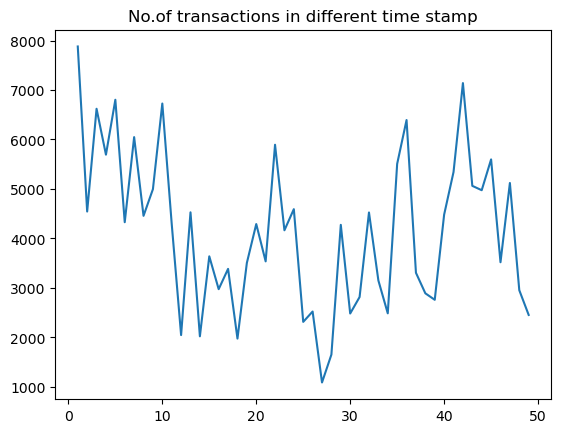

In [51]:
df_features['timestamp'].value_counts().sort_index().plot()
plt.title('No.of transactions in different time stamp')

Let's split the transaction based on the classes

In [55]:
df_merge = pd.merge(df_features,df_classes, left_on = 'txid', right_on = 'txId', how = 'left')
df_merge = df_merge.drop(['txId'],axis = 1)
df_merge.head()

,txid,timestamp,trans_1,trans_2,trans_3,trans_4,trans_5,trans_6,trans_7,trans_8,...,aggre_64,aggre_65,aggre_66,aggre_67,aggre_68,aggre_69,aggre_70,aggre_71,aggre_72,class
0,230425980,1,-0.171469,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162097,...,-0.600999,1.461330,1.461369,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
1,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792,unknown
2,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792,unknown
3,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792,2
4,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117,unknown


In [65]:
df_group = df_merge.groupby(['timestamp','class'])['txid'].count().reset_index().rename(columns = {'txid':'count'})
df_group.head()

,timestamp,class,count
0,1,1,17
1,1,2,2130
2,1,unknown,5733
3,2,1,18
4,2,2,1099


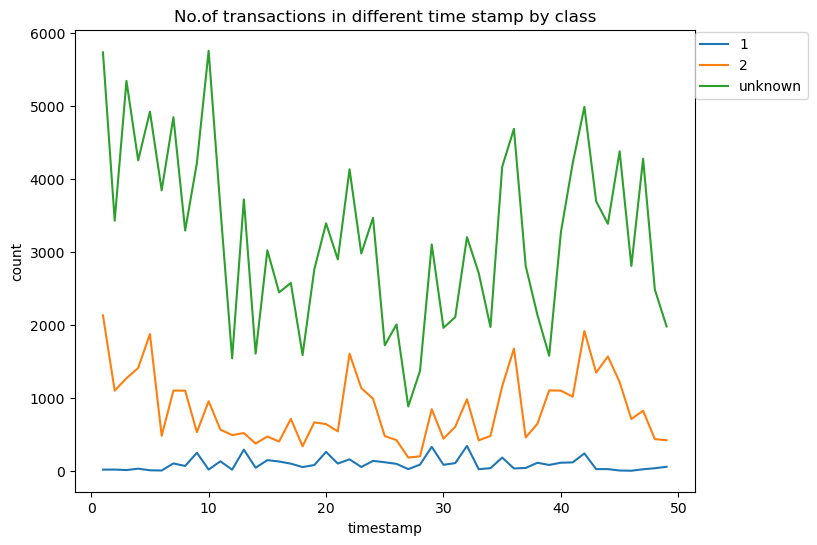

In [84]:
plt.figure(figsize = (8,6))
sns.lineplot(data = df_group , x = 'timestamp',y ='count',hue = 'class')
plt.title('No.of transactions in different time stamp by class')
plt.legend(loc = (1,0.85))
plt.show()

In [88]:
# my_report = sv.analyze(df_features)
# my_report.show_html()